# Time Series: Sequential data points collected over time.
1. **Autoregressive Integrated Moving Average (ARIMA)**:
   - Description: ARIMA models capture the linear relationship between an observation and a linear combination of lagged observations and lagged forecast errors.
   - Equation: $Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \ldots + \phi_p Y_{t-p} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \ldots + \theta_q \epsilon_{t-q} + \epsilon_t$


2. **Exponential Smoothing Methods**:
   - Description: Exponential smoothing methods assign exponentially decreasing weights to past observations to forecast future values.
   - Equations:
     - Simple Exponential Smoothing (SES): $\hat{y}_{t+1} = \alpha y_t + (1-\alpha)\hat{y}_t$
     - Double Exponential Smoothing (Holt's method): 
       - Level: $l_t = \alpha y_t + (1-\alpha)(l_{t-1} + b_{t-1})$
       - Trend: $b_t = \beta(l_t - l_{t-1}) + (1-\beta)b_{t-1}$
       - Forecast: $\hat{y}_{t+h} = l_t + hb_t$
     - Triple Exponential Smoothing (Holt-Winters method) for additive seasonality:
       - Level: $l_t = \alpha(y_t - s_{t-m}) + (1-\alpha)(l_{t-1} + b_{t-1})$
       - Trend: $b_t = \beta(l_t - l_{t-1}) + (1-\beta)b_{t-1}$
       - Seasonal: $s_t = \gamma(y_t - l_t) + (1-\gamma)s_{t-m}$
       - Forecast: $\hat{y}_{t+h} = l_t + hb_t + s_{t-m+h_m}$


3. **Prophet Model**
   - Description: Prophet offers simplicity, flexibility, and robustness in time series forecasting. Prophet is an open-source forecasting tool developed by Facebook.
   - Features: Automatic Seasonality Detection, Customizable Trend Modeling, Holidays and Special Events Handling, Scalability
   - Equation: $y(t) = g(t) + s(t) + h(t) + \varepsilon_t$ Where: $ y(t) $ represents the observed value of the time series at time $ t $.
, $ g(t) $ represents the trend component, $ s(t) $ represents the seasonal component, $ h(t) $ represents the holiday component and $ \varepsilon_t $ represents the error term.
   - Some notes on Prophet: Ease of Use, Flexibility, Robustness, Interpretability



# Data sets in statsmodels
https://www.statsmodels.org/dev/datasets/index.html
| Column Name      | Meaning                                                                     |
|------------------|-----------------------------------------------------------------------------|
| yearquarter      | Year and quarter of the observation (e.g., 1959Q1 represents the first quarter of 1959) |
| realgdp          | Real Gross Domestic Product (GDP), adjusted for inflation                    |
| realcons         | Real personal consumption expenditures                                      |
| realinv          | Real gross private domestic investment                                       |
| realgovt         | Real federal government consumption expenditures and gross investment       |
| realdpi          | Real personal disposable income                                             |
| cpi              | Consumer Price Index (CPI)                                                   |
| m1               | M1 money stock                                                               |
| tbilrate         | Treasury bill rate on 3-month securities, annualized                         |
| unemp            | Civilian unemployment rate, not seasonally adjusted                         |
| pop              | Population size                                                              |
| infl             | Inflation rate                                                               |
| realint          | Real interest rate on 1-year Treasury securities, annualized                |


We will focus on 
* realgdp: Real Gross Domestic Product (GDP) is a fundamental indicator of economic performance and is often used in time series analysis to understand overall economic trends.
* realcons: Real personal consumption expenditures provide insights into consumer spending behavior, which is a critical component of economic activity.
* realinv: Real gross private domestic investment reflects investment activity in the economy and is essential for understanding business cycle dynamics.
* unemp: The civilian unemployment rate is a key measure of labor market conditions and can help assess the health of the economy over time.

In [5]:
import pandas as pd
import statsmodels.api as sm
macro_econ_data = sm.datasets.macrodata.load_pandas().data
macro_econ_data.columns

Index(['year', 'quarter', 'realgdp', 'realcons', 'realinv', 'realgovt',
       'realdpi', 'cpi', 'm1', 'tbilrate', 'unemp', 'pop', 'infl', 'realint'],
      dtype='object')

In [6]:
econdf = macro_econ_data[['year', 'quarter', 'realgdp']]
econdf.head()

,year,quarter,realgdp
0,1959.0,1.0,2710.349
1,1959.0,2.0,2778.801
2,1959.0,3.0,2775.488
3,1959.0,4.0,2785.204
4,1960.0,1.0,2847.699


In [7]:
econdf.isna().sum().sum()

0

# Understanding the Augmented Dickey-Fuller (ADF) Test

- **Introduction**: A statistical test used to determine if a time series is stationary or non-stationary.
  
- **Test Result**: Returns a test statistic and a p-value.
  
- **Interpretation**: 
  - If p-value < 0.05: Reject the null hypothesis, indicating stationary series.
  - If p-value >= 0.05: Fail to reject the null hypothesis, suggesting non-stationarity.
  
- **Implications**: 
  - Stationary series are easier to model and forecast.
  - Non-stationary series may require transformations for modeling.
  
- **Example**: 
  - ADF test yields p-value < 0.05: Series is stationary.
  - Example: "realgdp" variable is suitable for time series modeling.


# Stationary vs. Non-stationary Time Series

## Stationary Time Series
- **Advantages:**: Simplified Modeling, Clear Patterns, Statistical Tests
- **Disadvantages:**: Limitations in Real-world Data, Data Transformation, Loss of Information

## Non-stationary Time Series
- **Advantages:**: Reflects Real-world Dynamics, Seasonal Patterns, Flexibility
- **Disadvantages:**: Complexity in Modeling, Prediction Challenges, Statistical Inference


In [8]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(econdf['realgdp'])

# Extract test statistic and p-value
adf_statistic = adf_result[0]
p_value = adf_result[1]

# Print the results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The time series is stationary (reject the null hypothesis)")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis)")


ADF Statistic: 1.7504627967647064
p-value: 0.9982455372335032
The time series is non-stationary (fail to reject the null hypothesis)


In [9]:
ad_fuller_result = adfuller(econdf.realgdp)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 1.7504627967647064
p-value: 0.9982455372335032


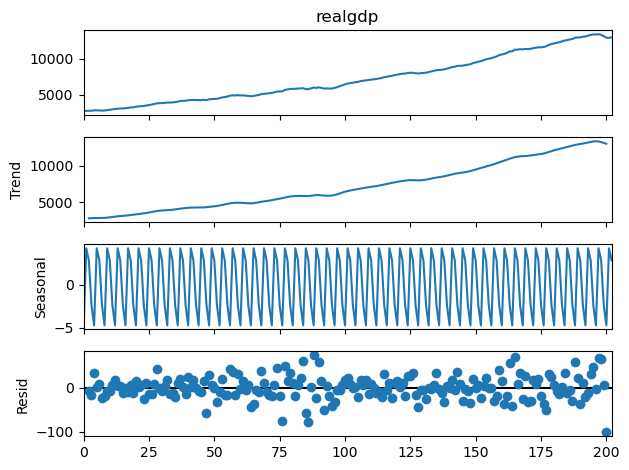

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 'econdf' is your DataFrame with the time series data
# 'realgdp' is the column containing the time series you want to decompose
# 'model' is the decomposition model ('additive' or 'multiplicative')
result = seasonal_decompose(econdf['realgdp'], period=4, model='additive')

# Plot the decomposition
result.plot()
plt.show()


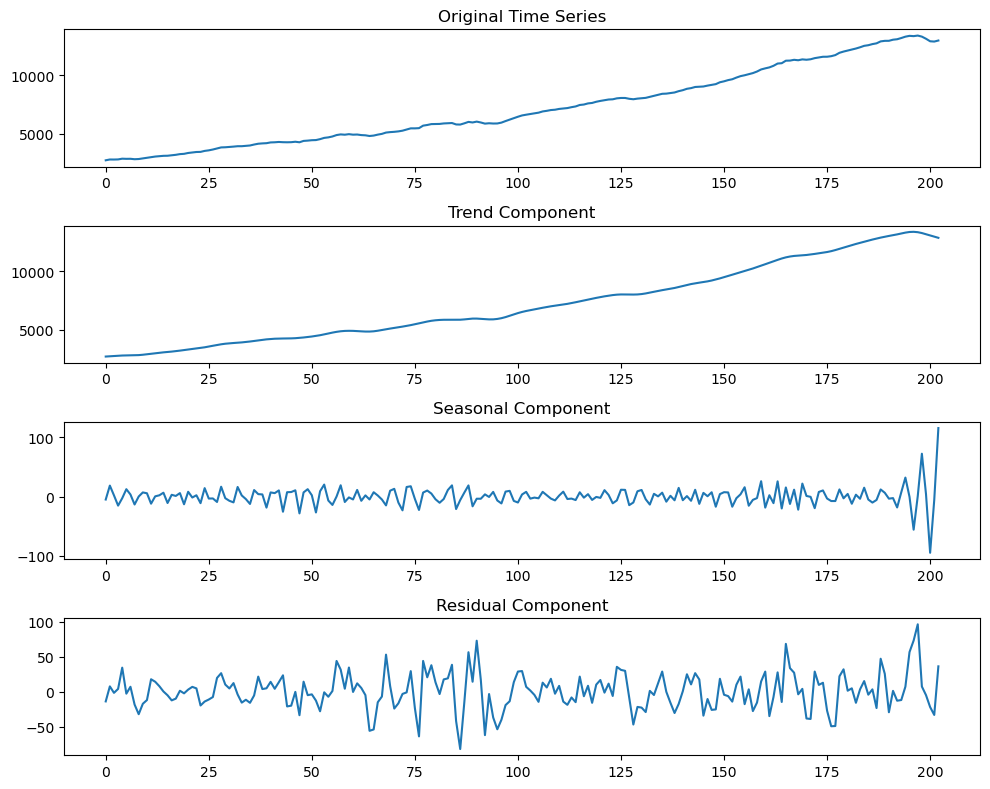

In [11]:

from statsmodels.tsa.seasonal import STL
# 'period' is the period of seasonality in your data (e.g., 4 for quarterly data)

period = 4  # Assuming quarterly data, adjust as needed

# Specify the number of observations to use for trend smoothing
trend_window = 15    # Adjust as needed

# Perform STL decomposition
result = STL(econdf['realgdp'], period=4).fit()
#stl = STL(econdf['realgdp'], seasonal=period, trend=trend_window)
#result = stl.fit()

# Plot the original time series and its components
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(econdf['realgdp'])
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual Component')

plt.tight_layout()
plt.show()



In [12]:
econdf.head()

,year,quarter,realgdp
0,1959.0,1.0,2710.349
1,1959.0,2.0,2778.801
2,1959.0,3.0,2775.488
3,1959.0,4.0,2785.204
4,1960.0,1.0,2847.699


In [13]:
econdf['year'] = econdf['year'].astype(int)
econdf['quarter'] = econdf['quarter'].astype(int)
econdf['date'] = pd.to_datetime(econdf['year'].astype(str) + 'Q' + econdf['quarter'].astype(str))
econdf.head()

/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_54281/3128606386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econdf['year'] = econdf['year'].astype(int)
/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_54281/3128606386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econdf['quarter'] = econdf['quarter'].astype(int)
/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_54281/3128606386.py:3: UserWarning: Could not infer format, so each element will be parsed individually

,year,quarter,realgdp,date
0,1959,1,2710.349,1959-01-01
1,1959,2,2778.801,1959-04-01
2,1959,3,2775.488,1959-07-01
3,1959,4,2785.204,1959-10-01
4,1960,1,2847.699,1960-01-01


# Time Series Analysis: Using `.diff()`:Calculates the difference between consecutive values in a time series.
- **Effect**: Transforms the time series into a series of changes over time.
- **Application**: Useful for detecting trends, identifying seasonality, and assessing stationarity.

In [14]:
econdf['diff'] = econdf['realgdp'].diff()

# Drop the first row since differencing introduces NaN values
econdf = econdf.dropna()

# Print the first few rows to verify the differencing operation
econdf.head()

/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_54281/182060913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econdf['diff'] = econdf['realgdp'].diff()


,year,quarter,realgdp,date,diff
1,1959,2,2778.801,1959-04-01,68.452
2,1959,3,2775.488,1959-07-01,-3.313
3,1959,4,2785.204,1959-10-01,9.716
4,1960,1,2847.699,1960-01-01,62.495
5,1960,2,2834.390,1960-04-01,-13.309


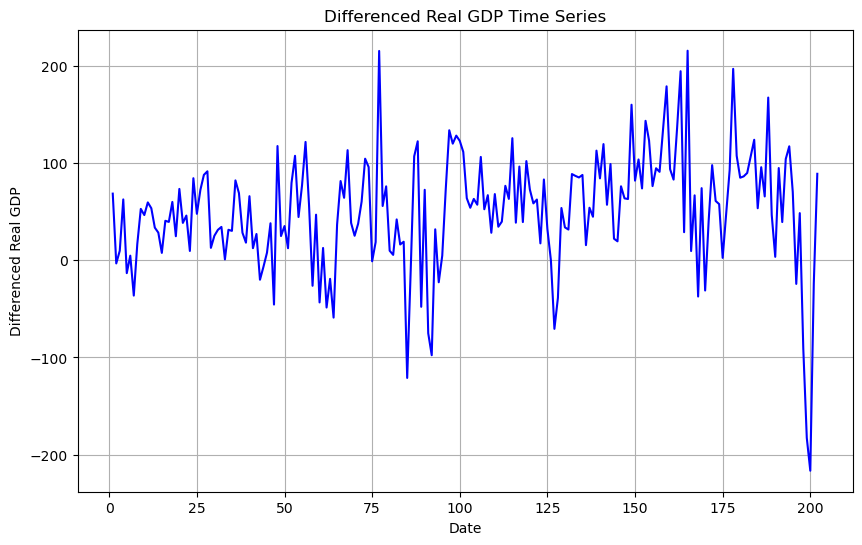

ADF Statistic: -6.305695561658104
p-value: 3.327882187668259e-08


In [11]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Plot the differenced time series data
plt.figure(figsize=(10, 6))
plt.plot(econdf['diff'], color='blue')
plt.title('Differenced Real GDP Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Real GDP')
plt.grid(True)
plt.show()

# Perform Augmented Dickey-Fuller (ADF) test
result = adfuller(econdf['diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

In [15]:
econdf.shape

(202, 5)

In [16]:

# Sort the DataFrame by the 'date' column to ensure chronological order
econdf = econdf.sort_values(by='date')

# Define the cutoff date for splitting the data
cutoff_index = len(econdf) - 45

# Split the data into training and testing sets
traindf = econdf.iloc[:-45]
testdf = econdf.iloc[-45:]

# Print the number of observations in each set
print("Number of observations in training set:", len(traindf))
print("Number of observations in testing set:", len(testdf))


Number of observations in training set: 157
Number of observations in testing set: 45


In [17]:
traindf.head()

,year,quarter,realgdp,date,diff
1,1959,2,2778.801,1959-04-01,68.452
2,1959,3,2775.488,1959-07-01,-3.313
3,1959,4,2785.204,1959-10-01,9.716
4,1960,1,2847.699,1960-01-01,62.495
5,1960,2,2834.390,1960-04-01,-13.309


# ARIMA: AutoRegressive Integrated Moving Average

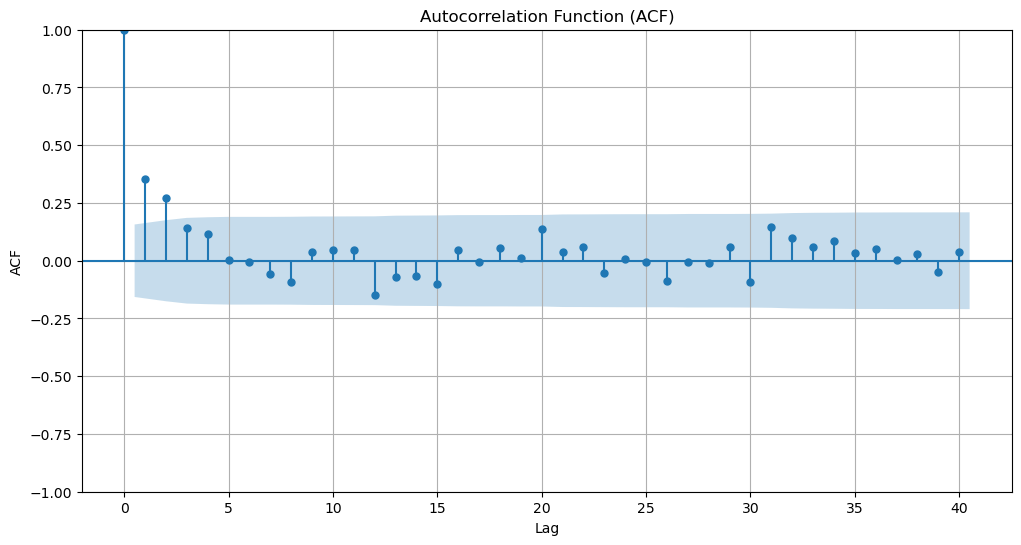

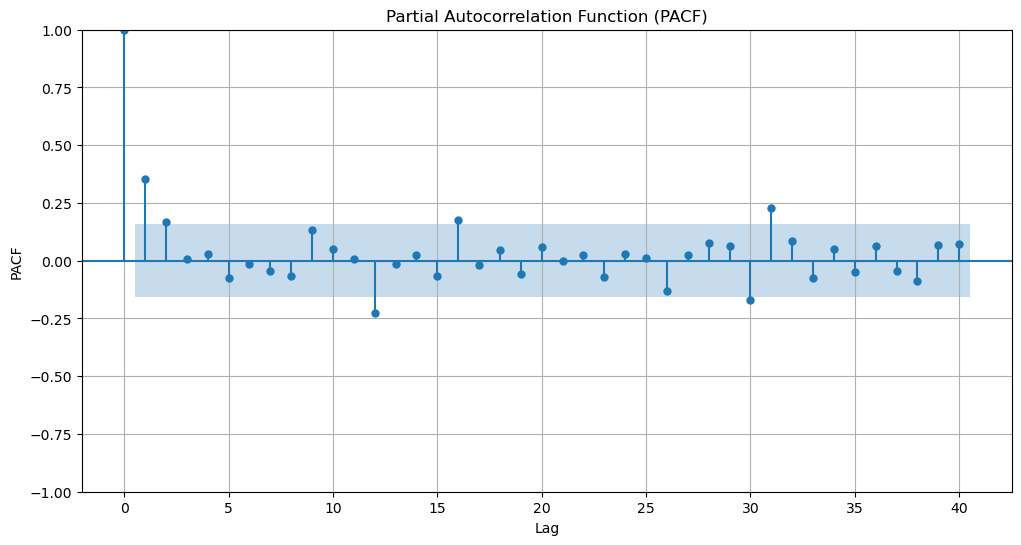

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(traindf['realgdp'].diff().dropna(), lags=40, ax=plt.gca())  # Drop NaN values
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(traindf['realgdp'].diff().dropna(), lags=40, ax=plt.gca())  # Drop NaN values
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()



In [19]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Define range of p, d, and q values
p_values = range(0, 3)  # Example range for p
d_values = range(0, 2)  # Example range for d
q_values = range(0, 3)  # Example range for q

# Initialize variables
best_aic = float("inf")
best_params = None

# Suppress warnings
warnings.filterwarnings("ignore")

# Grid search
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # Fit ARIMA model
        arima_model = ARIMA(traindf['realgdp'], order=(p, d, q))
        arima_result = arima_model.fit()

        # Compare AIC
        if arima_result.aic < best_aic:
            best_aic = arima_result.aic
            best_params = (p, d, q)
    except:
        continue

# Print best model parameters
print("Best model parameters (p, d, q):", best_params)

# Fit ARIMA model with best parameters
arima_model = ARIMA(traindf['realgdp'], order=best_params)
arima_result = arima_model.fit()

# Summary of the ARIMA model
print(arima_result.summary())



Best model parameters (p, d, q): (2, 1, 1)
                               SARIMAX Results                                
Dep. Variable:                realgdp   No. Observations:                  157
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -823.116
Date:                Sun, 11 Feb 2024   AIC                           1654.232
Time:                        23:06:53   BIC                           1666.432
Sample:                             0   HQIC                          1659.187
                                - 157                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3153      0.081     16.319      0.000       1.157       1.473
ar.L2         -0.3160      0.080     -3.957      0.000      -0.472      -0.159
ma.L1    

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define evaluation function
def evaluate_forecasts(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mse)
    return mse, mae, rmse
# Generate forecasts
forecast_values = arima_result.forecast(steps=len(testdf))
# Extract actual values from the testing dataset
actual_values = testdf['realgdp']

# Evaluate forecasts
mse, mae, rmse = evaluate_forecasts(actual_values, forecast_values)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 186579.90097809504
Mean Absolute Error (MAE): 394.73657080253696
Root Mean Squared Error (RMSE): 431.94895644982756


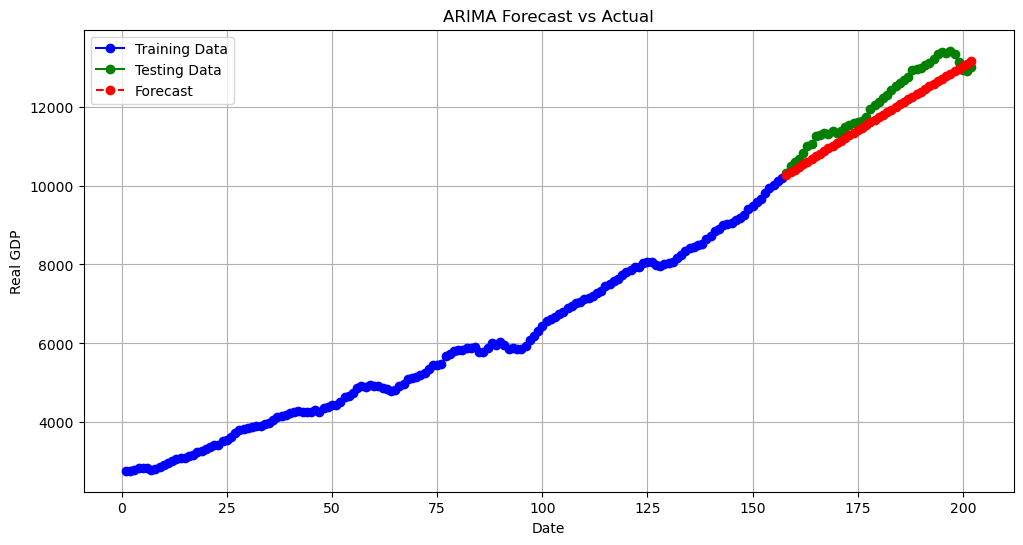

In [21]:
# Plot training, testing, and forecasted data
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(traindf.index, traindf['realgdp'], label='Training Data', color='blue', marker='o')

# Plot testing data
plt.plot(testdf.index, testdf['realgdp'], label='Testing Data', color='green', marker='o')

# Plot forecasted values
plt.plot(testdf.index, forecast_values, label='Forecast', color='red', marker='o', linestyle='dashed')

plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Real GDP')
plt.legend()
plt.grid(True)
plt.show()



# Exponential Smoothing

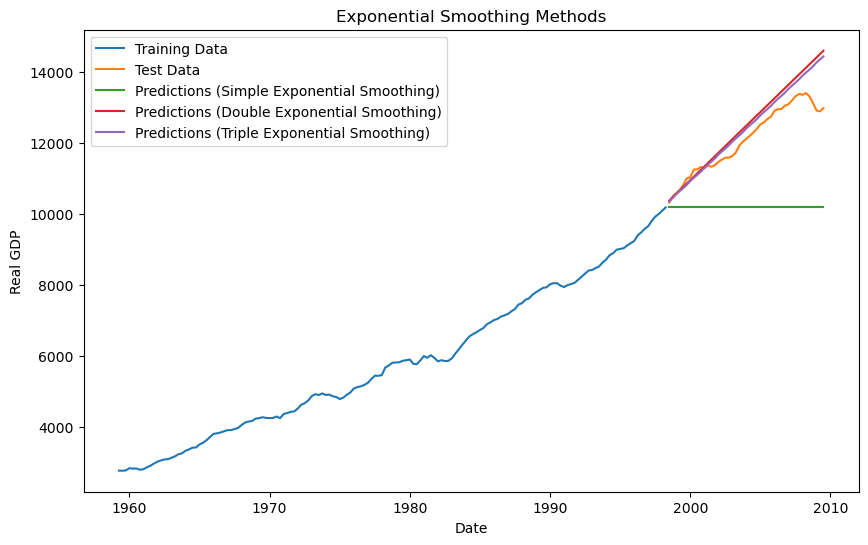

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Simple Exponential Smoothing
model_simple = ExponentialSmoothing(traindf['realgdp'])

# Double Exponential Smoothing (Holt's Method)
model_double = ExponentialSmoothing(traindf['realgdp'], trend='add')

# Triple Exponential Smoothing (Holt-Winters' Method)
model_triple = ExponentialSmoothing(traindf['realgdp'], trend='add', seasonal='add', seasonal_periods=4)

# Fit all models
fit_model_simple = model_simple.fit()
fit_model_double = model_double.fit()
fit_model_triple = model_triple.fit()

# Make predictions
predictions_simple = fit_model_simple.predict(start=testdf.index[0], end=testdf.index[-1])
predictions_double = fit_model_double.predict(start=testdf.index[0], end=testdf.index[-1])
predictions_triple = fit_model_triple.predict(start=testdf.index[0], end=testdf.index[-1])

# Plot the original data and predictions
plt.figure(figsize=(10, 6))
plt.plot(traindf['date'], traindf['realgdp'], label='Training Data')
plt.plot(testdf['date'], testdf['realgdp'], label='Test Data')
plt.plot(testdf['date'], predictions_simple, label='Predictions (Simple Exponential Smoothing)')
plt.plot(testdf['date'], predictions_double, label='Predictions (Double Exponential Smoothing)')
plt.plot(testdf['date'], predictions_triple, label='Predictions (Triple Exponential Smoothing)')
plt.xlabel('Date')
plt.ylabel('Real GDP')
plt.title('Exponential Smoothing Methods')
plt.legend()
plt.show()

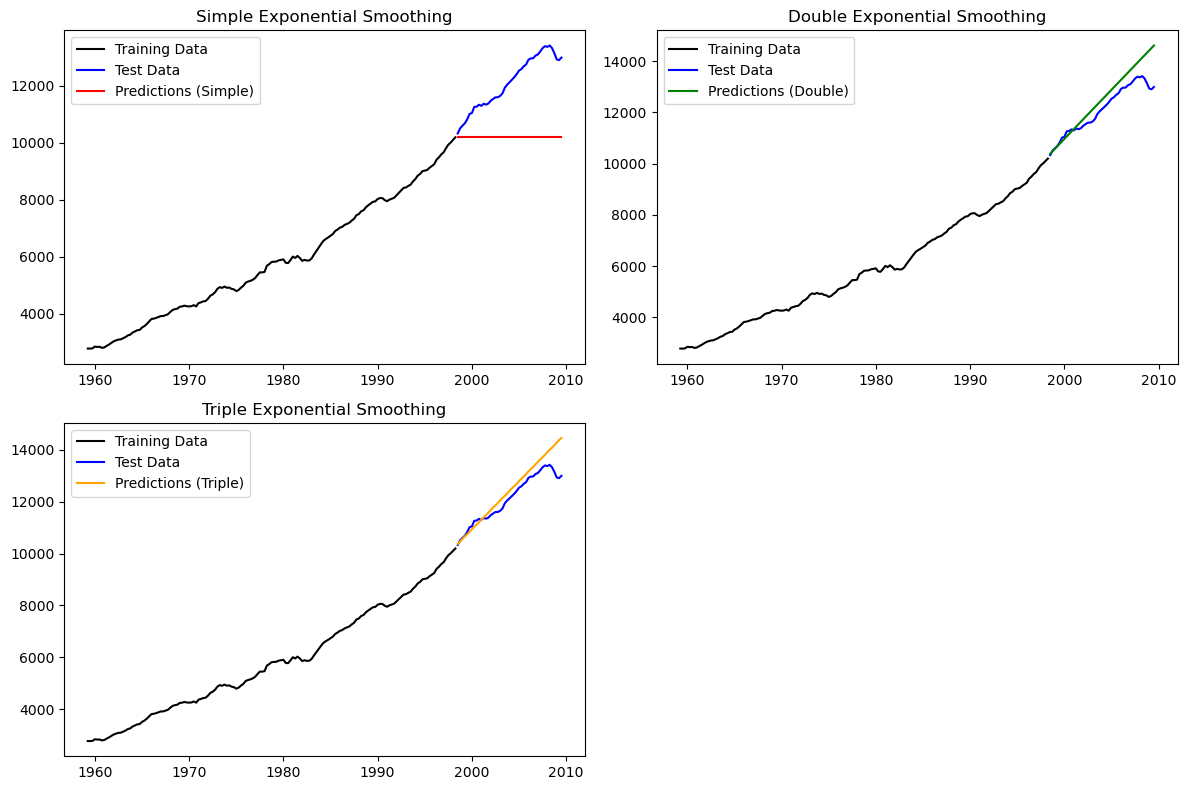

In [23]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot training data
axs[0, 0].plot(traindf['date'], traindf['realgdp'], label='Training Data', color='black')

# Plot test data
axs[0, 0].plot(testdf['date'], testdf['realgdp'], label='Test Data', color='blue')

# Plot predictions for simple exponential smoothing
axs[0, 0].plot(testdf['date'], predictions_simple, label='Predictions (Simple)', color='red')
axs[0, 0].set_title('Simple Exponential Smoothing')
axs[0, 0].legend()

# Plot predictions for double exponential smoothing
axs[0, 1].plot(traindf['date'], traindf['realgdp'], label='Training Data', color='black')
axs[0, 1].plot(testdf['date'], testdf['realgdp'], label='Test Data', color='blue')
axs[0, 1].plot(testdf['date'], predictions_double, label='Predictions (Double)', color='green')
axs[0, 1].set_title('Double Exponential Smoothing')
axs[0, 1].legend()

# Plot predictions for triple exponential smoothing
axs[1, 0].plot(traindf['date'], traindf['realgdp'], label='Training Data', color='black')
axs[1, 0].plot(testdf['date'], testdf['realgdp'], label='Test Data', color='blue')
axs[1, 0].plot(testdf['date'], predictions_triple, label='Predictions (Triple)', color='orange')
axs[1, 0].set_title('Triple Exponential Smoothing')
axs[1, 0].legend()

# Remove empty subplot
fig.delaxes(axs[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


23:09:41 - cmdstanpy - INFO - Chain [1] start processing
23:09:41 - cmdstanpy - INFO - Chain [1] done processing


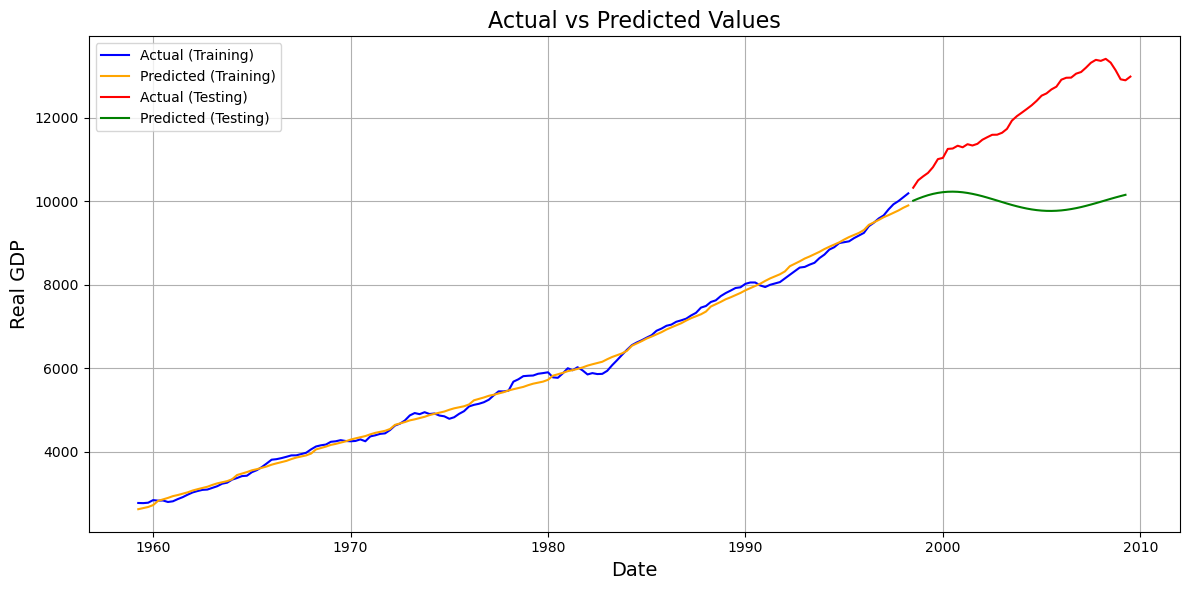

In [24]:
from prophet import Prophet
# Prepare the data for Prophet
train_data = traindf.copy()  # Create a copy to keep the original DataFrame intact
train_data['ds'] = pd.to_datetime(train_data['date'])  # Convert 'date' column to datetime format
train_data.rename(columns={'realgdp': 'y'}, inplace=True)  # Rename 'realgdp' to 'y' as required by Prophet

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train_data)

# Make future predictions for testing data
future_test = model.make_future_dataframe(periods=len(testdf))  # for testing data
forecast_test = model.predict(future_test)

# Create a DataFrame containing test data and predicted values with dates
test_and_predicted = pd.DataFrame({
    'date': testdf['date'],
    'actual': testdf['realgdp'],
    'predicted': forecast_test['yhat'].tail(len(testdf))  # Get the predicted values for the testing period
})

# Make future predictions for training data
future_train = model.make_future_dataframe(periods=0)  # for training data, no additional periods
forecast_train = model.predict(future_train)

# Plot actual and predicted values for both training and testing data
plt.figure(figsize=(12, 6))
plt.plot(train_data['ds'], train_data['y'], label='Actual (Training)', color='blue', linestyle='-')
plt.plot(forecast_train['ds'], forecast_train['yhat'], label='Predicted (Training)', color='orange', linestyle='-')
plt.plot(test_and_predicted['date'], test_and_predicted['actual'], label='Actual (Testing)', color='red', linestyle='-')
plt.plot(test_and_predicted['date'], test_and_predicted['predicted'], label='Predicted (Testing)', color='green', linestyle='-')

# Customize plot
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Real GDP', fontsize=14)
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


# More on Clustering

### Hierarchical Clustering (Agglomerative and Divisive)
- **Description**: Hierarchical clustering builds a tree-like hierarchy of clusters by iteratively merging (agglomerative) or splitting (divisive) clusters based on their similarity.
- **Math Equation (Agglomerative)**:
  - Let $d_{ij}$ be the distance between clusters $i$ and $j$.
  - Iteratively merge the two closest clusters until a stopping criterion is met.
  - Common linkage criteria include:
    - Single Linkage: $d_{ij} = \min(\text{dist}(a, b) \, \text{for} \, a \in A, b \in B)$
    - Complete Linkage: $d_{ij} = \max(\text{dist}(a, b) \, \text{for} \, a \in A, b \in B)$
    - Average Linkage: $d_{ij} = \text{mean}(\text{dist}(a, b) \, \text{for} \, a \in A, b \in B)$

### Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
- **Description**: DBSCAN groups together points that are closely packed together, forming high-density regions, while marking points in low-density regions as outliers.
- **Math Equation (Core Point)**:
  - Let $P$ be a point in the dataset, $\varepsilon$ be the maximum radius of the neighborhood, and $\text{MinPts}$ be the minimum number of points required to form a dense region.
  - $P$ is a core point if there are at least $\text{MinPts}$ points (including $P$) within distance $\varepsilon$.
- **Math Equation (Density-Reachable)**:
  - A point $Q$ is density-reachable from a point $P$ if there exists a chain of points $P_1, P_2, \ldots, P_n$ such that $P = P_1$, $Q = P_n$, and $P_i$ is directly density-reachable from $P_{i-1}$ for $i = 2, 3, \ldots, n$.

### Gaussian Mixture Models (GMM)
- **Description**: GMM represents each cluster as a probability distribution (typically a Gaussian distribution) and assigns data points to clusters based on the likelihood of belonging to each distribution.
- **Math Equation (Gaussian Distribution)**:
  - The probability density function (PDF) of a Gaussian distribution with mean $\mu$ and covariance $\Sigma$ is given by:
    $$ f(x | \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^k |\Sigma|}} \exp\left(-\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu)\right) $$
- **Math Equation (Expectation-Maximization)**:
  - GMM parameters (means, covariances, and mixing coefficients) are iteratively updated using the Expectation-Maximization (EM) algorithm to maximize the likelihood of the data.


# Data Set Details
- https://data.austintexas.gov/Public-Safety/GUIDE-Annual-Crime/csxt-6s3k/data
- **Primary Key (Year plus Incident Number)**: A unique identifier for the incident
- **Council District**: The city council district in which the incident occurred
- **GO Highest Offense Desc**: The most serious offense classification for the incident
- **Crime Type**: The specific type of crime that occurred
- **Report Date**: The date the incident was reported
- **Location**: The location where the incident occurred
- **X Coordinate**: The X coordinate of the incident location
- **Y Coordinate**: The Y coordinate of the incident location
- **Clearance Status**: The status of the investigation into the incident (e.g., open, closed)
- **Clearance Date**: The date the investigation was cleared (if applicable)
- **GO District**: The police district in which the incident occurred
- **Location Zip**: The ZIP code of the incident location
- **Census Tract**: The census tract of the incident location


In [25]:
crimes = pd.read_csv('2018_Annual_Crime.csv')
crimes.head(2)

,GO Primary Key (Year plus Incident Number),Council District,GO Highest Offense Desc,Crime Type,GO Report Date,GO Location,GO X Coordinate,GO Y Coordinate,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract
0,2.018344e+10,9.0,AUTO THEFT,Auto Theft,10-Dec-18,2902 HAMPTON RD,3118304.0,10078620.0,N,19-Dec-18,B,78705.0,4.01
1,2.018504e+10,9.0,THEFT BY SHOPLIFTING,Theft,16-Oct-18,1201 BARBARA JORDAN BLVD,3124601.0,10084923.0,N,17-Oct-18,B,78723.0,3.06


In [26]:
crimes.columns = ['IncidentID', 'CouncilDistrict','Offense_Class', 'CrimeType', 'IncidentDate',
       'Location', 'X_Location', 'Y_Location', 'ClearanceStatus','ClearanceDate', 'GoDistrict', 'LocationZip', 'GOCensusTract']
crimes.head()

,IncidentID,CouncilDistrict,Offense_Class,CrimeType,IncidentDate,Location,X_Location,Y_Location,ClearanceStatus,ClearanceDate,GoDistrict,LocationZip,GOCensusTract
0,2.018344e+10,9.0,AUTO THEFT,Auto Theft,10-Dec-18,2902 HAMPTON RD,3118304.0,10078620.0,N,19-Dec-18,B,78705.0,4.01
1,2.018504e+10,9.0,THEFT BY SHOPLIFTING,Theft,16-Oct-18,1201 BARBARA JORDAN BLVD,3124601.0,10084923.0,N,17-Oct-18,B,78723.0,3.06
2,2.018800e+10,10.0,BURGLARY OF VEHICLE,Theft,22-Jun-18,2600 LAKE AUSTIN BLVD,3104471.0,10074894.0,N,27-Jun-18,B,78703.0,16.02
3,2.018186e+10,4.0,BURGLARY OF RESIDENCE,Burglary,5-Jul-18,5330 N IH 35 SVRD SB,3124538.0,10087177.0,N,13-Sep-18,I,78751.0,21.05
4,2.018504e+10,7.0,BURGLARY OF VEHICLE,Theft,24-Sep-18,12802 POWDERHORN ST,3129160.0,10126575.0,N,24-Sep-18,A,78727.0,18.47


In [27]:
crimes.shape

(37156, 13)

In [28]:
crimes.isna().sum()

IncidentID            0
CouncilDistrict     261
Offense_Class         0
CrimeType             0
IncidentDate          0
Location            804
X_Location          885
Y_Location          885
ClearanceStatus    1454
ClearanceDate      1454
GoDistrict            0
LocationZip         167
GOCensusTract       167
dtype: int64

In [29]:
crimes = crimes.dropna()

In [30]:
# Convert the 'IncidentDate' column to datetime format
crimes['IncidentDate'] = pd.to_datetime(crimes['IncidentDate'])
# Create new columns for Year, Month, and Day
crimes['Year'] = crimes['IncidentDate'].dt.year
crimes['Month'] = crimes['IncidentDate'].dt.strftime('%B')
crimes['Day'] = crimes['IncidentDate'].dt.strftime('%A')
print(crimes.dtypes)
print(crimes.columns)

IncidentID                float64
CouncilDistrict           float64
Offense_Class              object
CrimeType                  object
IncidentDate       datetime64[ns]
Location                   object
X_Location                float64
Y_Location                float64
ClearanceStatus            object
ClearanceDate              object
GoDistrict                 object
LocationZip               float64
GOCensusTract             float64
Year                        int32
Month                      object
Day                        object
dtype: object
Index(['IncidentID', 'CouncilDistrict', 'Offense_Class', 'CrimeType',
       'IncidentDate', 'Location', 'X_Location', 'Y_Location',
       'ClearanceStatus', 'ClearanceDate', 'GoDistrict', 'LocationZip',
       'GOCensusTract', 'Year', 'Month', 'Day'],
      dtype='object')


In [31]:
df = crimes[['CouncilDistrict', 'CrimeType', 'X_Location', 'Y_Location','ClearanceStatus', 'GoDistrict', 'Year', 'Month', 'Day']]
df = pd.get_dummies(df)
df.shape

(34740, 43)

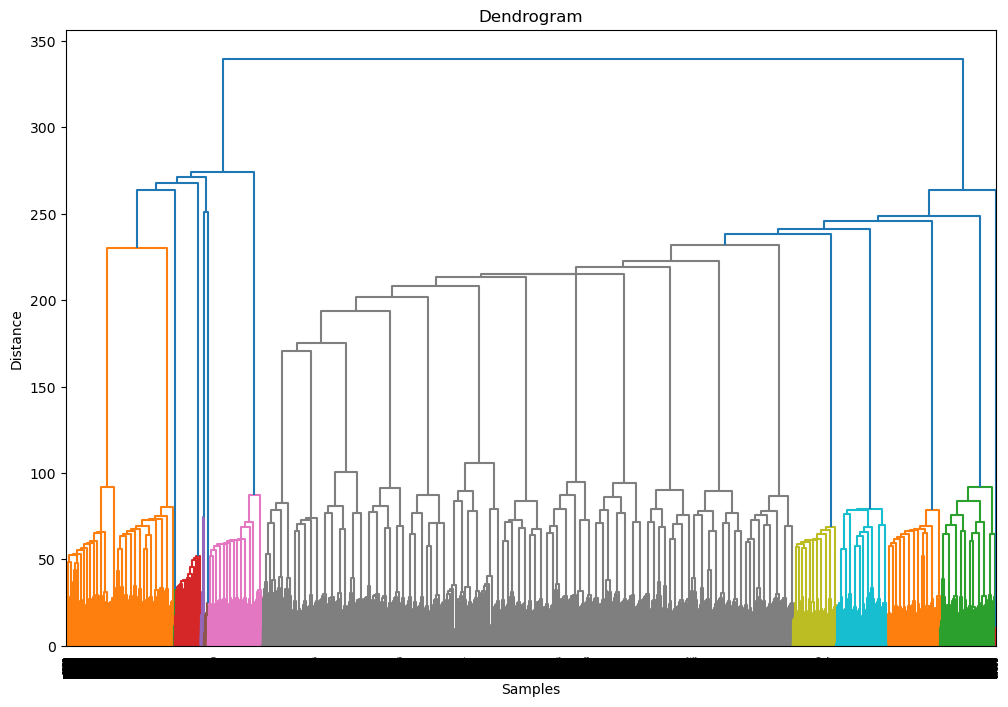

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Step 1: Find the optimal number of clusters using a dendrogram
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)  # Scale the data if necessary

linked = linkage(scaled_df, method='ward')  # Perform hierarchical clustering
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Step 2: Perform hierarchical clustering with the optimal number of clusters
# Based on the dendrogram, determine the optimal number of clusters

# Step 3: Plot the dendrogram
# This was already done in Step 1


In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range of clusters to try
range_n_clusters = range(3, 8)  # Adjust as needed

best_score = -1
best_n_clusters = -1

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize Agglomerative Clustering model
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    # Fit the model
    cluster_labels = clusterer.fit_predict(df)
    # Calculate silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    # Print the results
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg}")
    # Update best score and number of clusters if silhouette score is higher
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters

print(f"Optimal number of clusters based on silhouette score: {best_n_clusters}")


For n_clusters = 3, the average silhouette score is 0.377345241181337
For n_clusters = 4, the average silhouette score is 0.36916988088360664
For n_clusters = 5, the average silhouette score is 0.369505711684539
For n_clusters = 6, the average silhouette score is 0.37899038116664385
For n_clusters = 7, the average silhouette score is 0.3728937766419904
Optimal number of clusters based on silhouette score: 6


In [30]:
from sklearn.cluster import AgglomerativeClustering
# Set the number of clusters
n_clusters = 6

# Initialize Agglomerative Clustering model
clusterer = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model and predict cluster labels
cluster_labels = clusterer.fit_predict(df)
print(cluster_labels[:100])

[2 2 1 2 3 1 1 5 0 1 3 3 0 1 3 3 4 3 0 4 2 1 0 1 3 4 0 2 1 0 2 1 0 5 2 2 1
 1 0 1 2 0 1 4 4 0 4 0 1 1 3 2 0 3 5 1 0 2 0 2 0 1 2 1 0 1 1 0 3 3 5 3 0 0
 0 0 0 5 3 2 2 2 1 0 1 2 2 4 3 1 2 2 5 2 2 3 1 0 1 1]


In [33]:
from sklearn.cluster import DBSCAN

# Set the parameters for DBSCAN
eps = 0.1  # Maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 10  # Minimum number of samples in a neighborhood for a point to be considered as a core point

# Initialize DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model and predict cluster labels
cluster_labels = dbscan.fit_predict(df)

# Print the number of clusters
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Number of clusters: {num_clusters}")

# Print the cluster labels
print(f"Cluster labels: {cluster_labels}")


Number of clusters: 7
Cluster labels: [-1 -1 -1 ... -1 -1 -1]


In [32]:
np.unique(cluster_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6])

# GMM

In [34]:
from sklearn.mixture import GaussianMixture

# Initialize GMM model with the number of clusters
n_clusters = 6  # Specify the number of clusters
gmm = GaussianMixture(n_components=n_clusters, random_state=42)

# Fit the model to the data
gmm.fit(df)

# Predict cluster labels
cluster_labels = gmm.predict(df)

# Print the cluster labels
print("Cluster labels:", cluster_labels)


Cluster labels: [5 5 5 ... 0 3 2]
